[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Feature Matrix:
         cat       dog       fog   friends       mat
0  0.605349  0.000000  0.000000  0.000000  0.795961
1  0.000000  0.605349  0.795961  0.000000  0.000000
2  0.517856  0.517856  0.000000  0.680919  0.000000

Top keywords in each document:
Doc 1: ['mat', 'cat', 'dog']
Doc 2: ['fog', 'dog', 'cat']
Doc 3: ['friends', 'cat', 'dog']


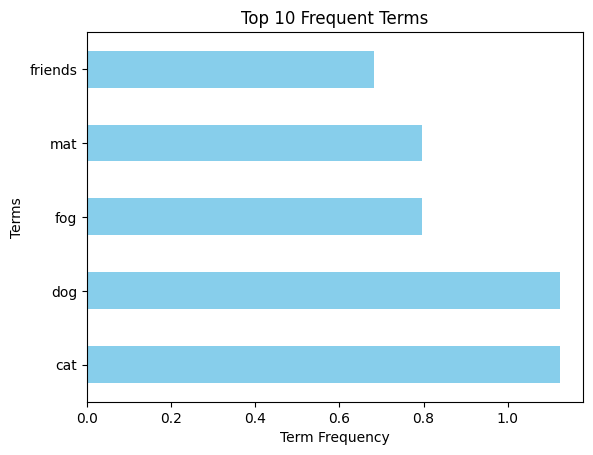

In [2]:
#6  Perform Feature extraction and analysis techniques on processed text.
import nltk
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# Download the 'stopwords' dataset
nltk.download('stopwords')

documents = [
    "The cat is on the mat",
    "The dog is in the fog",
    "The cat and the dog are friends"
]

stop_words = stopwords.words('english')

vectorizer = TfidfVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(documents)

df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print("Feature Matrix:\n", df)

print("\nTop keywords in each document:")
for i, row in df.iterrows():
    top_keywords = row.sort_values(ascending=False).head(3)
    print(f"Doc {i+1}: {list(top_keywords.index)}")

term_frequencies = df.sum(axis=0).sort_values(ascending=False)
term_frequencies.plot(kind='barh', color='skyblue', title='Top 10 Frequent Terms')
plt.xlabel('Term Frequency')
plt.ylabel('Terms')
plt.show()